# Entrelazamiento Cuántico

### 1 Qubit Quantum State
The orthogonal components of the Bloch sphere are the main states of a qubit. Here, I present the 6 states in bra-ket notation.


$$ \left| \psi \right> = \sqrt{1 - p} \left| 0 \right> + e^{j\phi}\sqrt{p}\left| 1 \right>$$

$$ \left| 0 \right> = \left(\begin{array}{c} 1 \\ 0 \end{array}\right) \ \ \ \ \ \ \ \ \left| 1 \right> = \left(\begin{array}{c} 0 \\ 1 \end{array}\right)$$ 

$$ \left| + \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> + \left| 1 \right>) = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right)   
\ \ \ \ \ \ \ \
\left| - \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> - \left| 1 \right>) \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right)$$ 

$$ \left| +j \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> + i\left| 1 \right>) = \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right)   
\ \ \ \ \ \ \ \
\left| -j \right> = \frac{1}{\sqrt{2}}(\left| 0 \right> - i\left| 1 \right>) \frac{1}{\sqrt{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right)$$ 


### Gates
The gates for obtaining the rotations about such axis are:

$$X = \sigma_x = \left(\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right)\ \ \ \ \ \ \ \ Y = \sigma_y = \left(\begin{array}{cc} 0 & -i \\ i & 0 \end{array}\right) \ \ \ \ \ \ \ \ Z = \sigma_z = \left(\begin{array}{cc} 1 & 0 \\ 0 & -1 \end{array}\right)$$

$$H = \frac{1}{\sqrt{2}} \left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}\right)\ \ \ \ \ \ \ \ S = \left(\begin{array}{cc} 1 & 0 \\ 0 & -i \end{array}\right)\ \ \ \ \ \ \ \ S^\dagger = \left(\begin{array}{cc} 1 & 0 \\ 0 & i \end{array}\right)$$

Some examples of such rotations are: 

$$X \left| 0 \right> =  \left| 1 \right>\ \ \ \ \ \ \ \ H \left| 0 \right> =  \left| + \right> \ \ \ \ \ \ \ \ SH\left| 0 \right> = \left| +j \right>$$

### Producto Kronecker  
The Kronecker product allows us to represent multiple qubits in one vector. However, when we increase the number of qubits the Bloch vector will not allow us to represent it in the Bloch spehere if we have an entanglement state.

$$A \otimes B = \left( \begin{array}{ccc} a_{11} B & \cdots & a_{1n}B \\ \vdots & \ddots & \vdots \\ a_{m1}B & \cdots & a_{mn}B \end{array}\right)$$

$$\left| 0 \right> \otimes \left| 0 \right> = \left| 00 \right> = \left(\begin{array}{c}1 \left(\begin{array}{c}1 \\0\end{array}\right)\\1\left(\begin{array}{c}1\\0\end{array}\right)\end{array}\right)= \left(\begin{array}{c}1\\0\\0\\0 \end{array}\right)$$


### CNOT gate
The CNOT gate or "controlled Not gate" is one of the fundamental blocks in quantum Computing. It allows to generate entanglement between qubits when combines with the Hamadard gate. 


$$ CNOT_{c,t} = \left(\begin{array}{cccc}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0 \end{array}\right)$$

$$CNOT\left| 00 \right> = \left| 00 \right>$$

$$CNOT\left| 10 \right> = \left| 11 \right>$$

$$CNOT\left(\left| +\right> \otimes \left|0 \right>\right) = \frac{1}{\sqrt{2}}(\left| 00 \right> + \left| 11 \right>)$$

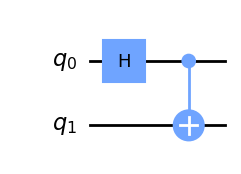

In [48]:
# Importo todo de qiskit
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

# Creo un circuito cuantico de 2 cubits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)  #control = cubit 0 y tarjet = cubit 1
# Dibujo el circuito
%matplotlib inline
qc.draw(output='mpl')

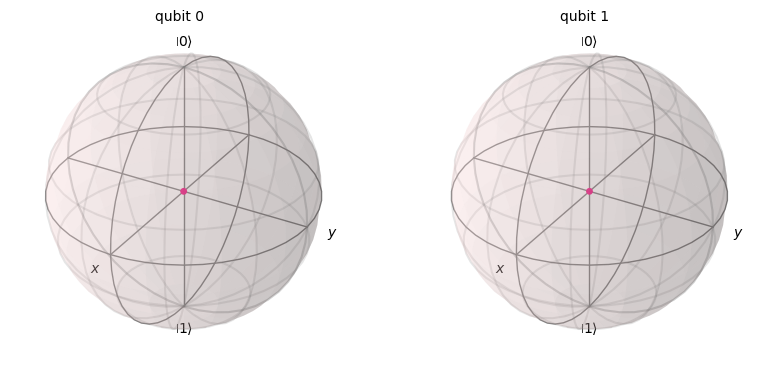

In [49]:
simulador = Aer.get_backend('statevector_simulator')
resultados = execute(qc, backend = simulador).result()
vector_estado = resultados.get_statevector()
plot_bloch_multivector(vector_estado)
# Ahora no me aparecen estados porque q0 y q1 están en un estado entrelazado

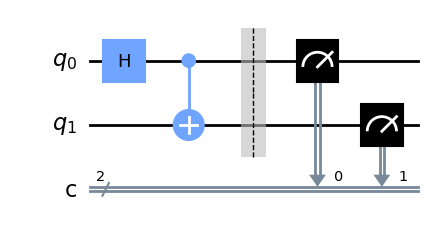

In [50]:
simulador = Aer.get_backend('qasm_simulator')
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw('mpl')

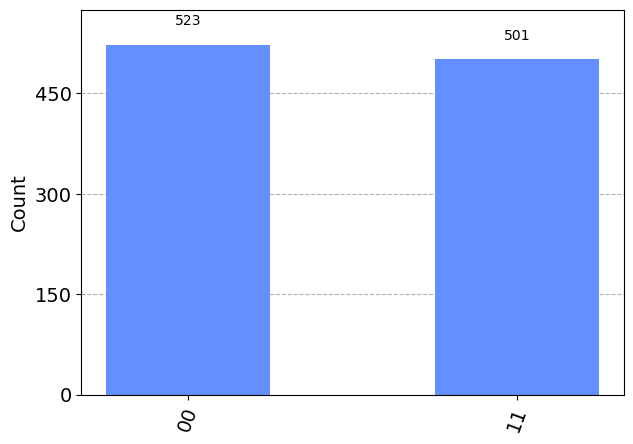

In [52]:
resultados = execute(qc, backend=simulador).result().get_counts()
plot_histogram(resultados)